In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [3]:
merged_df = pd.read_csv('../../data/life/life_data.csv')
# merged_df.head(), merged_df.shape, merged_df.columns.unique()

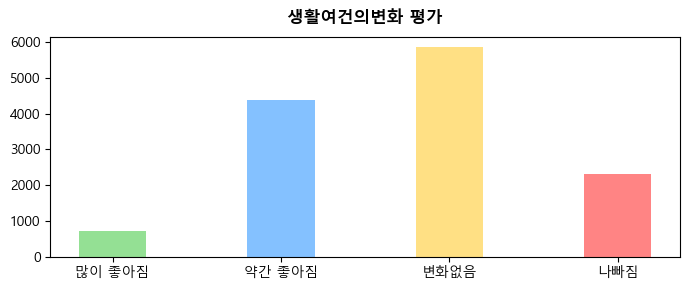

In [4]:
# 생활여건의변화 시각화
merged_df['나빠짐'] = (merged_df['약간 나빠짐'] + merged_df['많이 나빠짐'])

living_summary = {
    '많이 좋아짐': merged_df['많이 좋아짐'].sum(),
    '약간 좋아짐': merged_df['약간 좋아짐'].sum(),
    '변화없음': merged_df['변화없음'].sum(),
    '나빠짐': merged_df['나빠짐'].sum()
}

labels = living_summary.keys()
sizes = living_summary.values()

fig, ax = plt.subplots(figsize=(7,3))
ax.bar(labels, sizes, width=0.4, 
       color=[(0.3, 0.8, 0.3, 0.6),  # 많이 좋아짐
              (0.2, 0.6, 1.0, 0.6),  # 약간 좋아짐
              (1.0, 0.8, 0.2, 0.6),  # 변화없음
              (1.0, 0.2, 0.2, 0.6)]) # 나빠짐
ax.set_title('생활여건의변화 평가', pad=10, fontweight='bold')

plt.tight_layout()
plt.show()

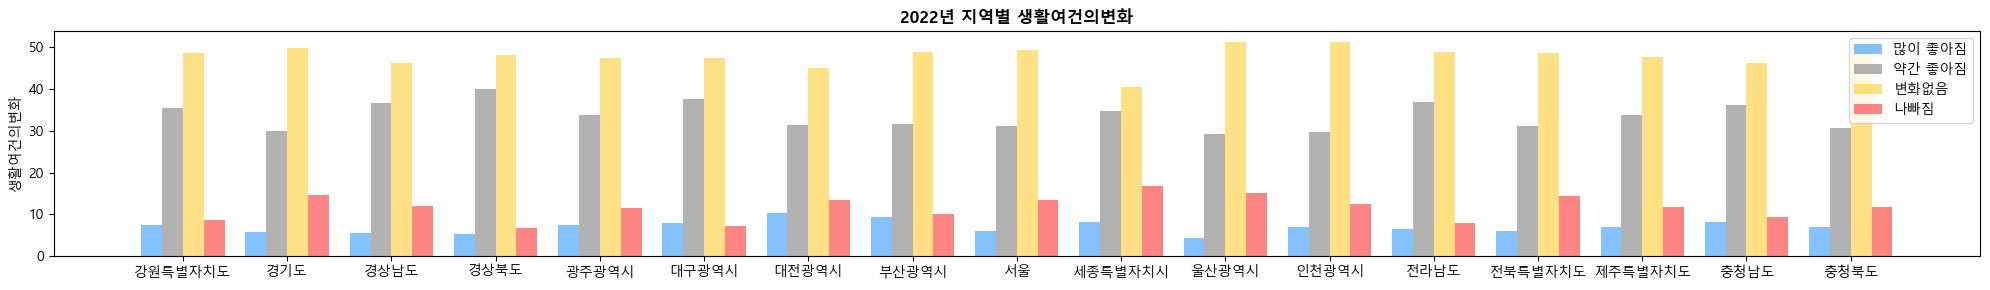

In [7]:
# 지역별 생활여건의변화 시각화
data_2023 = merged_df[merged_df['시점'] == 2023]
labels = data_2023['지역별']
x = range(len(labels))

much_better_rates = data_2023['많이 좋아짐']
slightly_better_rates = data_2023['약간 좋아짐']
no_change_rates = data_2023['변화없음']
worse_rates = data_2023['나빠짐']

bar_width = 0.2

plt.figure(figsize=(20, 3))
plt.bar(x, much_better_rates, width=bar_width, label='많이 좋아짐', color=(0.2, 0.6, 1.0, 0.6), align='center')
plt.bar([p + bar_width for p in x], slightly_better_rates, width=bar_width, label='약간 좋아짐', color=(0.5, 0.5, 0.5, 0.6), align='center')
plt.bar([p + bar_width * 2 for p in x], no_change_rates, width=bar_width, label='변화없음', color=(1.0, 0.8, 0.2, 0.6), align='center')
plt.bar([p + bar_width * 3 for p in x], worse_rates, width=bar_width, label='나빠짐', color=(1.0, 0.2, 0.2, 0.6), align='center')

plt.ylabel('생활여건의변화')
plt.title('2022년 지역별 생활여건의변화', fontweight='bold')
plt.xticks([p + bar_width * 1.5 for p in x], labels)
plt.legend()

plt.tight_layout()
plt.show()

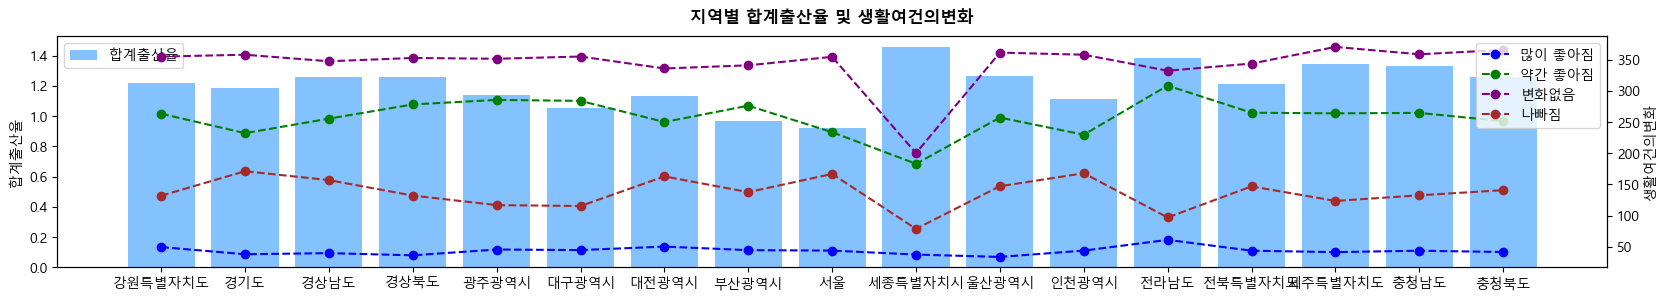

In [6]:
# 합계출산율과 생활여건의변화 시각화
merged_df['합계출산율'] = pd.to_numeric(merged_df['합계출산율'], errors='coerce')
fertility_data = merged_df.groupby('지역별')['합계출산율'].mean().reset_index()

living_data = {
    '많이 좋아짐': merged_df.groupby('지역별')['많이 좋아짐'].sum(),
    '약간 좋아짐': merged_df.groupby('지역별')['약간 좋아짐'].sum(),
    '변화없음': merged_df.groupby('지역별')['변화없음'].sum(),
    '나빠짐': merged_df.groupby('지역별')['나빠짐'].sum()
}
living_df = pd.DataFrame(living_data).reset_index()

fig, ax1 = plt.subplots(figsize=(20, 3))

ax1.bar(fertility_data['지역별'], fertility_data['합계출산율'], color=(0.2, 0.6, 1.0, 0.6), label='합계출산율', alpha=0.6)
ax1.set_title('지역별 합계출산율 및 생활여건의변화', pad=10, fontweight='bold')
ax1.set_ylabel('합계출산율', fontsize=10)
ax1.set_xticks(range(len(fertility_data['지역별'])))
ax1.set_xticklabels(fertility_data['지역별'])

ax2 = ax1.twinx()
colors = ['blue', 'green', 'purple', 'brown']
for idx, category in enumerate(living_df.columns[1:]):
    ax2.plot(living_df['지역별'], living_df[category], 
             marker='o', label=category, color=colors[idx], linestyle='--')

ax2.set_ylabel('생활여건의변화', fontsize=10)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')